# WPROWADZENIE DO SZTUCZNEJ INTELIGENCJI - LABORATORIUM 4

+ AUTOR: **ŁUKASZ STANISZEWSKI**
+ NR INDEKSU: **304098**
+ ADRES E-MAIL: **lukasz.staniszewski.stud@pw.edu.pl**
+ KIERUNEK: **INFORMATYKA**
+ PRZEDMIOT: **Wprowadzenie do sztucznej inteligencji**
+ ZADANIE: **[LINK](https://apps.usos.pw.edu.pl/apps/f/psc73Urd/lab4.pdf)**
+ SYSTEM OPERACYJNY: **Windows 10**
+ JĘZYK PROGRAMOWANIA: **Python 3.8**
+ TEMAT: **Implementacja modelu oraz metody uczącej liniowy SVM dopuszczający pomyłki, z wykorzystaniem bibliotek języka Python**

## 1. Import niezbędnych modułów
+ **sklearn.datasets.load_iris** - zbiór danych to iris, można go pobrać za pomocą tej metody
+ **pandas** - praca nad tabelami
+ **pyplot** oraz **seaborn** - wykresy
+ **numpy** - macierze, tablice
+ **math** - funkcje matematyczne
+ **sklearn.utils.shuffle** - do mieszania zbiorów testowych 

In [1]:
%matplotlib inline
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import math
from sklearn.utils import shuffle

## 2. Zbiór iris
+ w tym miejscu zostanie pobrany zbiór iris, jego elementy zestawione w formie tabeli

In [2]:
iris_set = load_iris()                 # loading iris dataset
df_iris = pd.DataFrame(iris_set['data'], columns=iris_set.feature_names)    # creating table dataframe of values
pd.set_option("display.max_rows", None)
df_iris.index.name = 'iris index'
df_iris['class'] = [iris_set.target_names[id] for id in iris_set.target]    # appending name of flower
df_iris    # showing full dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
iris index,,,,,
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa


+ dodatkowo zostaną przedstawione wykresy (w 2D) jak wyglądają poszczególne klasy w zależności od różnych parametrów
+ oczywiście optymalizowana będzie hiperpłaszczyzna ze względu na wszystkie z 4 parametrów ($x_1, x_2, x_3, x_4$), ale nie ma możliwości zobrazowania wykresu w więcej niż 3 wymiarach, dlatego są pokazywane w dwóch

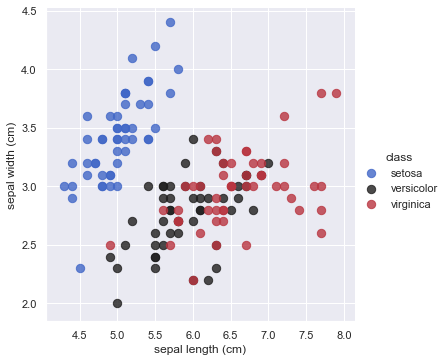

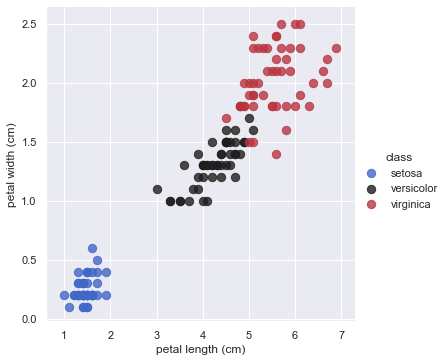

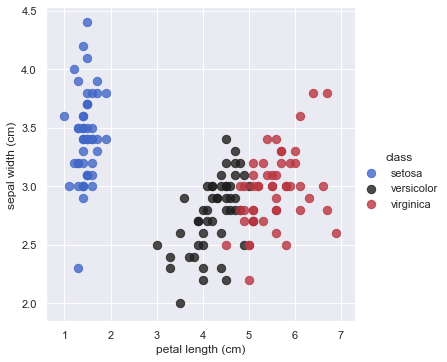

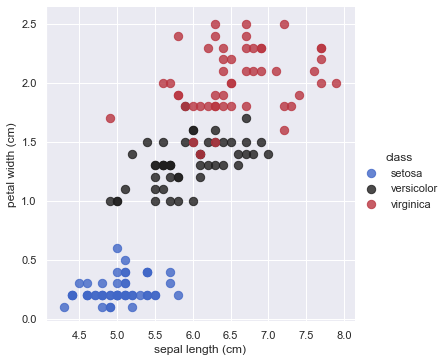

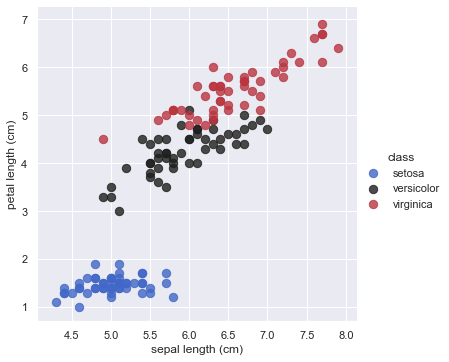

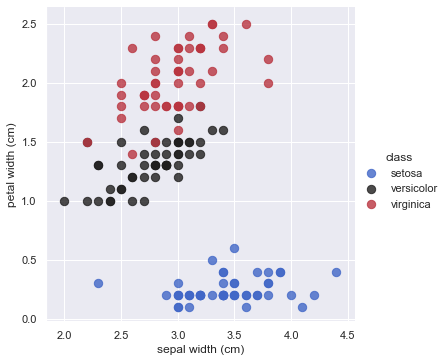

In [3]:
seaborn.set(rc={'figure.figsize':(20, 20)})
seaborn.lmplot(x='sepal length (cm)', y='sepal width (cm)', data=df_iris, hue='class', palette = "icefire", fit_reg=False, scatter_kws={"s":70})
seaborn.lmplot(x='petal length (cm)', y='petal width (cm)', data=df_iris, hue='class', palette = "icefire", fit_reg=False, scatter_kws={"s":70})
seaborn.lmplot(x='petal length (cm)', y='sepal width (cm)', data=df_iris, hue='class', palette = "icefire", fit_reg=False, scatter_kws={"s":70})
seaborn.lmplot(x='sepal length (cm)', y='petal width (cm)', data=df_iris, hue='class', palette = "icefire", fit_reg=False, scatter_kws={"s":70})
seaborn.lmplot(x='sepal length (cm)', y='petal length (cm)', data=df_iris, hue='class', palette = "icefire", fit_reg=False, scatter_kws={"s":70})
seaborn.lmplot(x='sepal width (cm)', y='petal width (cm)', data=df_iris, hue='class', palette = "icefire", fit_reg=False, scatter_kws={"s":70})


+ w tym miejscu nastąpi podzielenie zbioru iris na podzbiory dla każdej klasy:

In [4]:
setosa = iris_set.data[:50, :]                              # set of setosa
versicolor = iris_set.data[50:100, :]                       # set of versicolor
virginica = iris_set.data[100:150, :]                       # set of virginica

## 3. Zdefiniowanie problemu
### 3.1. Ogólnie
+ Zadanie polega na znalezieniu funkcji: <img src="https://i.upmath.me/svg/f(x)%3D%7Bw%5E%7BT%7Dx-b%7D" alt="f(x)={w^{T}x-b}" /> która tworzy hiperpłaszczyznę zapewniającą klasyfikację (dopuszczającą pomyłki) z użyciem maszyny wektorów nośnych SVM.


+ Otrzymana funkcja powinna zapewniać jak najmniejszą liczbę pomyłek przy klasyfikowaniu elementów zbioru IRIS do odpowiedniej klasy. Klasyfikacja odbywa się poprzez zwrócenie dla danego zestawu cech (**x**) - grupy (**y(x) = -1 v y(x) = 1**) do której należy za pomocą funkcji: <img src="https://i.upmath.me/svg/y(x)%20%3D%0A%5Cleft%5C%7B%20%5Cbegin%7Barray%7D%7Bll%7D%0A-1%20%26%20%5Ctextrm%7B%2C%20%24f(x)%5Cleqslant0%24%7D%5C%5C%0A1%20%26%20%5Ctextrm%7B%2C%20%24f(x)%3E0%24%7D%0A%5Cend%7Barray%7D%5Cright.%0A" alt="y(x) =
\left\{ \begin{array}{ll}
-1 &amp; \textrm{, $f(x)\leqslant0$}\\
1 &amp; \textrm{, $f(x)&gt;0$}
\end{array}\right.
" />


+ Aby otrzymać funkcję **f(x)** należy znaleźć parametry **w** i **b**, które minimalizują funkcję straty:  <img src="https://i.upmath.me/svg/J(w%2Cb)%3D%5CSigma_i(max(1-f(x_i)y_i%2C%200))%20%2B%20%5Clambda*%7C%7Cw%7C%7C%5E2" alt="J(w,b)=\Sigma_i(max(1-f(x_i)y_i, 0)) + \lambda*||w||^2" />

+ Aby zoptymalizować owe parametry, zastosowana zostanie **metoda gradientu prostego**, w tym celu potrzebny będzie gradient funkcji **J(w,b)**: <img src="https://i.upmath.me/svg/%5Cnabla%20J%20%3D%20%5Cbegin%7Bbmatrix%7D%20%5Cpartial%20J%20%5Cover%20%5Cpartial%20w_1%20%5C%5C%20%5C%5C...%5C%5C%20%5C%5C%20%5Cpartial%20J%20%5Cover%20%5Cpartial%20w_n%20%5C%5C%20%5C%5C%20%20%5Cpartial%20J%20%5Cover%20%5Cpartial%20b%20%5Cend%7Bbmatrix%7D" alt="\nabla J = \begin{bmatrix} \partial J \over \partial w_1 \\ \\...\\ \\ \partial J \over \partial w_n \\ \\  \partial J \over \partial b \end{bmatrix}" /> a pochodne cząstkowe te prezentują się następująco: 
<img src="https://i.upmath.me/svg/%20%7B%5Cpartial%20J%20%5Cover%20%5Cpartial%20w_i%7D%20%3D%20%20%7B%5Clambda*2*w_i%7D%20%2B%20%5CSigma_k(1%20*%20%7B%5Cleft%5C%7B%20%5Cbegin%7Barray%7D%7Bll%7D%0A0%20%26%20%5Ctextrm%7B%2C%20%24%201-f(x_k)y_k%20%5Cleqslant%200%24%20%7D%5C%5C%0A-y_k*x_%7Bk%5Bi%5D%7D%20%26%20%5Ctextrm%7B%2C%20%24%201-f(x_k)y_k%20%3E%200%24%7D%0A%5Cend%7Barray%7D%5Cright%20%7D)" alt=" {\partial J \over \partial w_i} =  {\lambda*2*w_i} + \Sigma_k(1 * {\left\{ \begin{array}{ll}
0 &amp; \textrm{, $ 1-f(x_k)y_k \leqslant 0$ }\\
-y_k*x_{k[i]} &amp; \textrm{, $ 1-f(x_k)y_k &gt; 0$}
\end{array}\right })" />


<img src="https://i.upmath.me/svg/%20%7B%5Cpartial%20J%20%5Cover%20%5Cpartial%20b%7D%20%3D%20%20%5CSigma_k(1%20*%20%7B%5Cleft%5C%7B%20%5Cbegin%7Barray%7D%7Bll%7D%0A0%20%26%20%5Ctextrm%7B%2C%20%24%201-f(x_k)y_k%20%5Cleqslant%200%24%20%7D%5C%5C%0Ay_k%20%26%20%5Ctextrm%7B%2C%20%24%201-f(x_k)y_k%20%3E%200%24%7D%0A%5Cend%7Barray%7D%5Cright%20%7D)" alt=" {\partial J \over \partial b} =  \Sigma_k(1 * {\left\{ \begin{array}{ll}
0 &amp; \textrm{, $ 1-f(x_k)y_k \leqslant 0$ }\\
y_k &amp; \textrm{, $ 1-f(x_k)y_k &gt; 0$}
\end{array}\right })" />



### 3.2. Zdefiniowanie niezbędnych funkcji do trenowania:
+ funkcja **f(x)**:

In [5]:
def f(given_x, params):
    b = params[-1]
    w = params[:-1]
    w = np.matrix(w)
    x = np.matrix(given_x)
    if w.shape[0] != 1:  # w = horizontal vector
        w = w.transpose()
    if x.shape[0] == 1: # x = vertical vector
        x = x.transpose()
    return (w*x).item(0) - b

+ gradient **J(w, b)**:

In [6]:
def grad_j(params, set_xs, set_ys, lambd, function_f):
    """
    param params: vector of parameters ([w1,...,wn,b])
    param set_xs: collection of parameteres of data for classification
    param set_ys: collection of results of data for classification
    param lambd: lambda used for SVM (λ)
    param function_f: function of which the gradient is
    """
    result = np.zeros(len(params))              # result is a numpy array of partial derivatives
    # counting gradients for w1, w2, ..., wn 
    for iterator_w in range(len(params) - 1):   # partial derivatives for w1,..., wn
        summ = 2*lambd*params[iterator_w]       # sum = 2 * λ * wi
        for index, x in enumerate(set_xs):
            y = set_ys[index]
            distance = 1 - y* function_f(x, params)
            if distance > 0:                    # if (1-f(xk)yk) > 0
                summ -= y*x[iterator_w]         # sum = sum - yk*xk[i]
        result[iterator_w] = summ
    # counting gradient for b
    summ = 0                                    # sum = 0
    for index, x in enumerate(set_xs):
        y =set_ys[index]
        distance = 1 - y* function_f(x, params)
        if distance >0:                        # if (1-f(xk)yk) > 0
            summ += y                          # sum += yk
    result[-1] = summ
    return result
    

+ algorytm realizujący metodę gradientu prostego:

In [7]:
def gradient_descent(function_f, gradient_f, params, beta, set_xs, set_ys, lambd, max_steps=10000, min_epsilon = 1e-20):
        """
        param function_f: function that is optimized
        param gradient_f: gradient of function_f
        param params: parameters to optimize
        param beta: parameter beta used in gradient_descent
        param set_xs: collection of parameters of data to classify
        param set_ys: collection of targets of data to classify
        param lambd: parameter used in SVM (λ)
        params max_steps and min_epsilon: parameters for STOP CRITERIUM in gradient_descent
        """
        new_param = params
        act_step = 0
        while(True):
            act_gradient = gradient_f(new_param, set_xs, set_ys, lambd, function_f)
            if np.linalg.norm(act_gradient) < min_epsilon or act_step > max_steps:
                return new_param
            new_param = new_param - beta * act_gradient
            act_step += 1

### 3.2. Zdefiniowanie niezbędnych funkcji do testowania:
+ funkcja **y(x)**:

In [16]:
def classify_y(x, function_f, params):
    if function_f(x, params) <=0:
        return -1
    else:
        return 1

## 4. Trenowanie i testowanie:
+ zadaniem jest wytrenowanie modeli dla każdej pary klas ze zbioru danych iris
+ dlatego też konieczne będzie stworzenie dokładnie 3 modeli (dla pary setosa-versicolor, setosa-virginica oraz versicolor-virginica) i ich wytrenowanie
+ założone zostało, że zbiór danych zostanie podzielony na zbiór uczący, zbiór walidacyjny i zbiór testowy kolejno w stosunku 64:16:20
+ zanim zostaną przeprowadzone poszczególne klasyfikacje, należy najpierw zdefiniować zmienne pomagające rozdzielić zbiór danych:

In [17]:
setosa_training_x = setosa[:32, :]                     # 0.64 x 50 = 32
setosa_validating_x = setosa[32:40, :]                   # 0.16 x 50 = 8
setosa_testing_x = setosa[40:50, :]
versicolor_training_x = versicolor[:32, :]
versicolor_validating_x = versicolor[32:40, :]
versicolor_testing_x = versicolor[40:50, :]
virginica_training_x = virginica[:32, :]
virginica_validating_x = virginica[32:40, :]
virginica_testing_x = virginica[40:50, :]

setosa_training_y = np.array(iris_set.target[:32])
setosa_validating_y = np.array(iris_set.target[32:40])
setosa_testing_y = np.array(iris_set.target[40:50])
versicolor_training_y = np.array(iris_set.target[50:82])
versicolor_validating_y = np.array(iris_set.target[82:90])
versicolor_testing_y = np.array(iris_set.target[90:100])
virginica_training_y = np.array(iris_set.target[100:132])
virginica_validating_y = np.array(iris_set.target[132:140])
virginica_testing_y = np.array(iris_set.target[140:150]) 

training_setosa_versicolor_x = np.concatenate((setosa_training_x, versicolor_training_x))
training_setosa_versicolor_y = np.concatenate((setosa_training_y, versicolor_training_y))
testing_setosa_versicolor_x = np.concatenate((setosa_testing_x, versicolor_testing_x))
testing_setosa_versicolor_y = np.concatenate((setosa_testing_y, versicolor_testing_y))
validating_setosa_versicolor_x = np.concatenate((setosa_validating_x, versicolor_validating_x))
validating_setosa_versicolor_y = np.concatenate((setosa_validating_y, versicolor_validating_y))

training_setosa_virginica_x = np.concatenate((setosa_training_x, virginica_training_x))
training_setosa_virginica_y = np.concatenate((setosa_training_y, virginica_training_y))
testing_setosa_virginica_x = np.concatenate((setosa_testing_x, virginica_testing_x))
testing_setosa_virginica_y = np.concatenate((setosa_testing_y, virginica_testing_y))
validating_setosa_virginica_x = np.concatenate((setosa_validating_x, virginica_validating_x))
validating_setosa_virginica_y = np.concatenate((setosa_validating_y, virginica_validating_y))

training_virginica_versicolor_x = np.concatenate((virginica_training_x, versicolor_training_x))
training_virginica_versicolor_y = np.concatenate((virginica_training_y, versicolor_training_y))
testing_virginica_versicolor_x = np.concatenate((virginica_testing_x, versicolor_testing_x))
testing_virginica_versicolor_y = np.concatenate((virginica_testing_y, versicolor_testing_y))
validating_virginica_versicolor_x = np.concatenate((virginica_validating_x, versicolor_validating_x))
validating_virginica_versicolor_y = np.concatenate((virginica_validating_y, versicolor_validating_y))

for ind, val in enumerate(training_setosa_versicolor_y):         # setosa values = -1 / versicolor = 1
    if val == 0:
        training_setosa_versicolor_y[ind] = -1
for ind, val in enumerate(testing_setosa_versicolor_y):
    if val == 0:
        testing_setosa_versicolor_y[ind] = -1
for ind, val in enumerate(validating_setosa_versicolor_y):
    if val == 0:
        validating_setosa_versicolor_y[ind] = -1


for ind, val in enumerate(training_setosa_virginica_y):
    if val == 0:
        training_setosa_virginica_y[ind] = -1                   # setosa values = -1 / virginica = 1
    elif val == 2:
        training_setosa_virginica_y[ind] = 1
for ind, val in enumerate(testing_setosa_virginica_y):
    if val == 0:
        testing_setosa_virginica_y[ind] = -1                   
    elif val == 2:
        testing_setosa_virginica_y[ind] = 1
for ind, val in enumerate(validating_setosa_virginica_y):
    if val == 0:
        validating_setosa_virginica_y[ind] = -1                   
    elif val == 2:
        validating_setosa_virginica_y[ind] = 1

for ind, val in enumerate(training_virginica_versicolor_y):    # virginica = -1 / versicolor = 1
    if val == 2:
        training_virginica_versicolor_y[ind] = -1
for ind, val in enumerate(testing_virginica_versicolor_y):
    if val == 2:
        testing_virginica_versicolor_y[ind] = -1
for ind, val in enumerate(validating_virginica_versicolor_y):
    if val == 2:
        validating_virginica_versicolor_y[ind] = -1

# training and testing sets are shuffled
training_setosa_versicolor_x, training_setosa_versicolor_y = shuffle(training_setosa_versicolor_x, training_setosa_versicolor_y)
training_setosa_virginica_x, training_setosa_virginica_y = shuffle(training_setosa_virginica_x, training_setosa_virginica_y)
training_virginica_versicolor_x, training_virginica_versicolor_y = shuffle(training_virginica_versicolor_x, training_virginica_versicolor_y)
testing_setosa_versicolor_x, testing_setosa_versicolor_y = shuffle(testing_setosa_versicolor_x, testing_setosa_versicolor_y)
testing_setosa_virginica_x, testing_setosa_virginica_y = shuffle(testing_setosa_virginica_x, testing_setosa_virginica_y)
testing_virginica_versicolor_x, testing_virginica_versicolor_y = shuffle(testing_virginica_versicolor_x, testing_virginica_versicolor_y)
validating_setosa_versicolor_x, validating_setosa_versicolor_y = shuffle(validating_setosa_versicolor_x, validating_setosa_versicolor_y)
validating_setosa_virginica_x, validating_setosa_virginica_y = shuffle(validating_setosa_virginica_x, validating_setosa_virginica_y)
validating_virginica_versicolor_x, validating_virginica_versicolor_y = shuffle(validating_virginica_versicolor_x, validating_virginica_versicolor_y)


+ dodatkowo zostaną zdefiniowane funkcje: trenujące model (**train_model()**) oraz wykonujące walidacje dla hiperparametru lambda(**validate_model()**)
+ a także zostanie zdefiniowany zbiór możliwych lambd **lambdas = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5]**:

In [20]:
lambdas = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5]

def train_model(model0, training_set_x, training_set_y, param_lambda):
    return gradient_descent(f, grad_j, model0, 0.1, training_set_x, training_set_y, param_lambda)

def validate_model(training_set_x, training_set_y, validating_set_x, validating_set_y):
    best_model = None
    best_lambda = None
    best_score = - math.inf
    for param_lambda in lambdas:
        model0 = [0, 0, 0, 0, 0]
        actual_model = train_model(model0, training_set_x, training_set_y, param_lambda)
        results_validating = np.zeros(len(validating_set_y), dtype='int')
        for ind, x in enumerate(validating_set_x):
            results_validating[ind]=int(classify_y(x, f, actual_model))
        n_of_successes = 0
        for x, y in zip(results_validating, validating_set_y):
            if x == y:
                n_of_successes += 1
        print(f"Validating model with lambda: {param_lambda} gave score: {n_of_successes / len(results_validating)}")
        # as long as new score is not worse than actual best, lambda should be maximized
        if (n_of_successes / len(results_validating) >= best_score):      
            best_score = n_of_successes / len(results_validating)
            best_lambda = param_lambda
            best_model = actual_model
    print(f"Best lambda for this validation equals: {best_lambda} with score: {best_score}")
    return best_model

### 4.1. Para Setosa-Versicolor
+ nauka modelu na zbiorze trenującym wraz z walidacją parametru lambda:

In [21]:
model41 = validate_model(training_setosa_versicolor_x, training_setosa_versicolor_y, validating_setosa_versicolor_x, validating_setosa_versicolor_y)

Validating model with lambda: 0.0001 gave score: 1.0
Validating model with lambda: 0.0005 gave score: 1.0
Validating model with lambda: 0.001 gave score: 1.0
Validating model with lambda: 0.005 gave score: 1.0
Validating model with lambda: 0.01 gave score: 1.0
Validating model with lambda: 0.05 gave score: 1.0
Validating model with lambda: 0.1 gave score: 1.0
Validating model with lambda: 0.5 gave score: 1.0
Validating model with lambda: 1 gave score: 0.5625
Validating model with lambda: 5 gave score: 0.5
Best lambda for this validation equals: 0.5 with score: 1.0


+ parametry jakie zostały ustalone dla najlepszego modelu:

In [22]:
model41

array([ 3.06408195,  0.17045184,  4.349517  ,  1.54268226, 29.1       ])

+ klasy do jakich model przydzielił poszczególne elementy zbioru testowego:

In [23]:
results_testing_41 = np.zeros(len(testing_setosa_versicolor_y), dtype='int')
for ind, x in enumerate(testing_setosa_versicolor_x):
    results_testing_41[ind]=int(classify_y(x, f, model41))
results_testing_41

array([ 1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1, -1,
        1, -1,  1])

+ wyniki, jakie powinny zostać otrzymane:

In [24]:
testing_setosa_versicolor_y

array([ 1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1, -1,
        1, -1,  1])

+ otrzymany sukces:

In [25]:
def get_success_percent(model_results, official_results):
    sum = 0
    for x, y in zip(model_results, official_results):
        if x==y:
            sum+=1
    fraction = sum / len(model_results)
    print(f"Success percent: {100*fraction}%")

get_success_percent(results_testing_41, testing_setosa_versicolor_y)

Success percent: 100.0%


### 4.2. Para Setosa-Virginica
+ model uczony na zbiorze uczącym:

In [26]:
model42 = validate_model(training_setosa_virginica_x, training_setosa_virginica_y, validating_setosa_virginica_x, validating_setosa_virginica_y)

Validating model with lambda: 0.0001 gave score: 1.0
Validating model with lambda: 0.0005 gave score: 1.0
Validating model with lambda: 0.001 gave score: 1.0
Validating model with lambda: 0.005 gave score: 1.0
Validating model with lambda: 0.01 gave score: 1.0
Validating model with lambda: 0.05 gave score: 1.0
Validating model with lambda: 0.1 gave score: 1.0
Validating model with lambda: 0.5 gave score: 0.875
Validating model with lambda: 1 gave score: 1.0
Validating model with lambda: 5 gave score: 0.5
Best lambda for this validation equals: 1 with score: 1.0


+ parametry $ w $, $ b $  jakie zostały ustalone:

In [27]:
model42

array([ 4.45811413, -0.11937872,  8.8630819 ,  3.74608921, 72.2       ])

+ klasy do jakich model przydzielił poszczególne elementy zbioru testowego:

In [28]:
results_testing_42 = np.zeros(len(testing_setosa_virginica_y), dtype='int')
for ind, x in enumerate(testing_setosa_virginica_x):
    results_testing_42[ind]=int(classify_y(x, f, model42))
results_testing_42

array([ 1,  1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1,  1,
       -1, -1, -1])

+ wyniki, jakie powinny zostać otrzymane:

In [29]:
testing_setosa_virginica_y

array([ 1,  1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1,  1,
       -1, -1, -1])

+ procent sukcesu:

In [30]:
get_success_percent(results_testing_42, testing_setosa_virginica_y)

Success percent: 100.0%


## 4.3. Para Virginica-Versicolor
+ model uczony na zbiorze uczącym:

In [31]:
model43 = validate_model(training_virginica_versicolor_x, training_virginica_versicolor_y, validating_virginica_versicolor_x, validating_virginica_versicolor_y)

Validating model with lambda: 0.0001 gave score: 0.875
Validating model with lambda: 0.0005 gave score: 0.8125
Validating model with lambda: 0.001 gave score: 0.5625
Validating model with lambda: 0.005 gave score: 0.8125
Validating model with lambda: 0.01 gave score: 0.5
Validating model with lambda: 0.05 gave score: 0.625
Validating model with lambda: 0.1 gave score: 0.5
Validating model with lambda: 0.5 gave score: 0.5
Validating model with lambda: 1 gave score: 0.5
Validating model with lambda: 5 gave score: 0.5
Best lambda for this validation equals: 0.0001 with score: 0.875


+ ustalone parametry:

In [32]:
model43

array([ 63.5192719 ,  55.15151808, -97.73241607, -83.09357404,
       -69.2       ])

+ klasy do jakich przydzielone zostały poszczególne elementy zbioru testowego:

In [33]:
results_testing_43 = np.zeros(len(testing_virginica_versicolor_y), dtype='int')
for ind, x in enumerate(testing_virginica_versicolor_x):
    results_testing_43[ind]=int(classify_y(x, f, model43))
results_testing_43

array([-1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1,  1])

+ wyniki, jakie powinny zostać otrzymane:

In [34]:
testing_virginica_versicolor_y

array([-1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1,  1])

+ procent sukcesu:

In [35]:
get_success_percent(results_testing_43, testing_virginica_versicolor_y)

Success percent: 100.0%


## 5. WNIOSKI
+ na podstawie 3 zamieszczonych wyżej klasyfikacji można zauważyć jak istotny jest parametr λ dla metody SVM
+ patrząc na wykresy w punkcie 2., można zauważyć, że niezależnie od doboru cech zbiór setosa można odseparować liniowo od pozostałych zbiorów cech
+ inna sytuacja występuje w przypadku zależności między parą virginica-versicolor: na każdym wykresie elementy z tych dwóch klas znajdują się bardzo blisko siebie
+ sytuację tą potwierdzają przeprowadzone badania - w przypadku klasyfikacji setosa-versicolor (4.1.) oraz setosa-virginica(4.2.) większa wartość parametru λ (odpowiednio λ=0.5 oraz λ=1) gwarantuje 100% sukces klasyfikacji na zbiorze testowym
+ różnica występuje w przypadku pary virginica-versicolor(4.3.) - tutaj ustawienie parametru λ na wartość większą 0.05 powodowała, że klasyfikacja na zbiorze walidacyjnym posiadała procent sukcesu = ok. 50% (najprawdopodobniej przypisywała wszystkie obiekty do tylko jednej klasy); dopiero zmniejszenie λ do wartości 0.0001 zapewniło 87,5% sukces klasyfikacji na zbiorze walidacyjnym i  100% sukces klasyfikacji na zbiorze testowym
+ oznacza to, że czym mniejsza jest wartość współczynnika λ, tym tworzona hiperpłaszczyzna jest węższa, i jest mniejsza szansa na błędne sklasyfikowanie elementu zbioru testującego